In [1]:
import networkx as nx

##########################
## cycles
##########################

# cycle basis of the graph
def cycle_basis(G):
    all_cycles = []
    all_cycles_set = set()
    for node in G.nodes():
        current_cycles = nx.cycle_basis(G, node)
        current_set = [frozenset(c) for c in current_cycles]
        for idx, s in enumerate(current_set):
            if s not in all_cycles_set:
                all_cycles_set.add(s)
                all_cycles.append(current_cycles[idx])
    return all_cycles

# remove cycle if it forms a clique
def reduced_cycle_basis(cycle_basis, max_cliques):
    return [cy for cy in cycle_b for cl in max_cliques if not set(cy).issubset(cl)]

##########################
## cliques
##########################

# cliques with length > 2
def max_cliques(G):
    return sorted([clique for clique in nx.find_cliques(G) if len(clique)>2])

##########################
## "line" path
## similar to bridges
##########################

# return list of node and corresponding neighbors when the number of neighbors is le than n
def _le_n_neigh_nodes(G, n):
    l_nodes = {}
    for node in nx.nodes(G):
        neighbors = list(nx.neighbors(G, node))
        if len(neighbors) <= n:
            l_nodes[node] = neighbors
    return l_nodes

# construct the path where each node as
def _search_line_rec(l_node, path, l_nodes): # faster implementation possible with dp or check presence
    path.append(l_node)
    if l_node in l_nodes:
        for neighbors in l_nodes[l_node]:
            if neighbors not in path:
                _search_line_rec(neighbors, path, l_nodes)
    return path

# return the "line" paths of the graph, n constrain the "path size"
def line_paths(G, n):
    line_paths = []
    l_nodes = _le_n_neigh_nodes(G, n)

    for l_node in list(l_nodes.keys()):
        path = _search_line_rec(l_node, [], l_nodes)
        line_paths.append(path)

    reduced_line_path = list([list(x) for x in set([frozenset(path) for path in line_paths if len(path) > 2])])
    return reduced_line_path


##########################
## Component
##########################

# Generates nodes in each maximal k-edge-connected component in G.
def k_edge_comp(G, k):
    return [comp for comp in sorted(map(sorted, nx.k_edge_components(G, k=2))) if len(comp) > 2]

#A k-component is a maximal subgraph of a graph G that has, at least, node connectivity k: we need to remove at least k nodes
#to break it into more components. k-components have an inherent hierarchical structure because they are nested in terms of connectivity:
#a connected graph can contain several 2-components, each of which can contain one or more 3-components, and so forth.
def k_comp(G):
    return [list(comp[0]) for comp in nx.k_components(G).values()]


##########################
## Star
##########################

def _star_rec(node, visited, layer):
    if layer == 0:
        return
    visited.add(node)
    for neighbors in list(nx.neighbors(G, node)):
        _star_rec(neighbors, visited, layer-1)
    return list(visited)

def star(G, n):
    stars = []
    for node in nx.nodes(G):
        stars.append(_star_rec(node, set(), n+1))
    return stars

In [7]:
import matplotlib.pyplot as plt
import random

1189


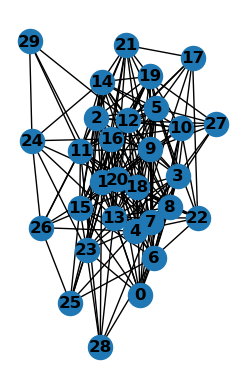

In [35]:
G = nx.extended_barabasi_albert_graph(30, 4, 0.1, 0.8)
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
print(len(cycle_basis(G)))

In [4]:
cy = cycle_basis(G)

In [5]:
cy

[[2, 21, 0],
 [7, 21, 0],
 [15, 21, 0],
 [1, 21, 0],
 [19, 21, 0],
 [3, 9, 21, 0],
 [17, 9, 21],
 [20, 9, 21],
 [7, 9, 21],
 [4, 9, 21, 0],
 [12, 26, 9, 21],
 [20, 26, 9],
 [2, 26, 9, 21],
 [3, 26, 9],
 [17, 26, 9],
 [7, 18, 26, 9],
 [1, 18, 26, 9, 21],
 [2, 18, 26],
 [3, 18, 26],
 [15, 18, 26, 9, 21],
 [19, 18, 26, 9, 21],
 [6, 18, 26, 9],
 [4, 18, 26, 9],
 [13, 18, 26, 9, 21, 0],
 [17, 18, 26],
 [25, 18, 26],
 [23, 18, 26, 9, 21],
 [4, 28, 18],
 [3, 28, 18],
 [8, 28, 18, 26, 9, 21, 0],
 [23, 28, 18],
 [12, 28, 18, 26],
 [20, 10, 18, 26],
 [3, 10, 18],
 [13, 10, 18],
 [8, 10, 18, 26, 9, 21, 0],
 [6, 22, 10, 18],
 [2, 22, 10, 18],
 [12, 22, 10, 18, 26],
 [15, 22, 10, 18],
 [25, 22, 10, 18],
 [19, 22, 10, 18],
 [2, 14, 10, 18],
 [1, 14, 10, 18],
 [19, 14, 10, 18],
 [25, 14, 10, 18],
 [16, 14, 10, 18, 26, 9, 21],
 [6, 14, 10, 18],
 [7, 25, 26, 9],
 [11, 25, 26, 9, 21, 0],
 [8, 25, 26, 9, 21, 0],
 [17, 25, 26],
 [23, 25, 26, 9, 21],
 [16, 25, 26, 9, 21],
 [3, 25, 26],
 [2, 25, 26],
 [13, 

In [6]:
def select_random_edge(cycle):
    idx = random.randrange(len(cycle))
    if idx == len(cycle)-1:
        return (cycle[idx], cycle[0])
    else:
        return (cycle[idx], cycle[idx+1])
        

In [7]:
current_cycle_basis = cycle_basis(G)
while len(current_cycle_basis) != 0:
    cycle = current_cycle_basis[random.randrange(len(current_cycle_basis))]
    (u, v) = select_random_edge(cycle)
    print(u,v)
    G.remove_edge(u, v)
    current_cycle_basis = cycle_basis(G)

28 12
6 7
10 3
25 23
23 12
3 13
21 19
5 26
19 14
6 9
15 0
11 5
7 25
4 1
15 27
8 1
18 25
14 2
13 18
17 18
13 8
12 17
7 15
8 17
21 1
5 17
25 22
4 5
18 7
19 7
25 14
4 28
10 8
14 10
16 1
3 29
27 19
22 12
9 4
6 11
2 8
12 4
6 8
3 16
16 17
8 19
1 3
2 17
25 11
23 3
29 11
22 15
25 2
17 6
7 8
12 21
18 10
2 22
0 11
23 18
11 23
5 19
13 12
5 12
26 3
21 0
28 8
26 18
24 13
20 26
23 6
26 25
26 17
5 27
23 21
2 3
10 22
3 15
13 4
3 4
3 7
6 1
11 2
16 13
2 18
5 15
7 0
9 17
15 1
17 21
12 8
15 17
3 25
15 20
2 13
14 6
20 10
16 24
19 11
14 16
2 16
9 3
11 13
0 13
7 5
2 23
20 21
1 0
21 15
2 0
21 16
1 23
8 3
19 13
7 2
0 27
18 3
15 19
11 8
26 2
25 16
23 15
23 29
6 2
20 17
25 17
8 0
15 6
18 1
4 18
5 20
15 13
7 11
21 2
11 4
3 0
0 19
16 7
9 20
9 26
18 15
19 18
7 21
4 7
3 17
19 1
2 4


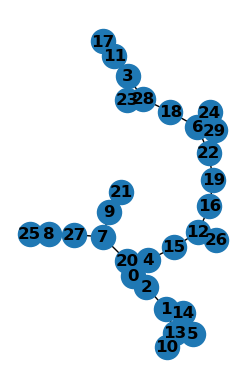

In [8]:
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')


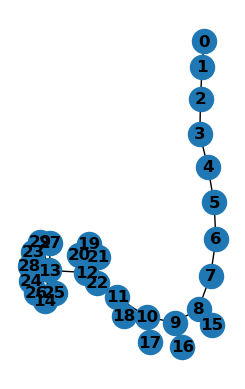

In [9]:
G = nx.random_powerlaw_tree(30, 4, None, 100000)
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

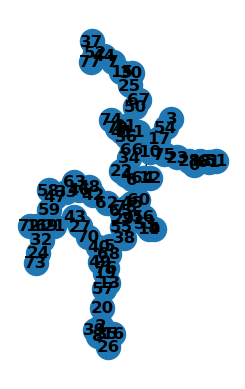

In [10]:
G = nx.random_tree(80)
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')


In [11]:
def add_random_edges(G, n):
    nodes = list(G.nodes())
    nodes_num = len(nodes) - 1 
    new_edges = []
    for i in range(n):
        u = nodes[random.randrange(nodes_num)]
        v = nodes[random.randrange(nodes_num)]
        new_edges.append((u,v))
        
    G.add_edges_from(new_edges)                      

In [12]:
add_random_edges(G, 10)

In [13]:
print(len(cycle_basis(G)))

62


In [14]:
G.graph['num_cycle'] = 5

In [15]:
graph_label = G.graph.get('label')
graph_label

In [16]:
G2 = G

In [17]:
G2.graph['label'] = 'My Graph'

In [18]:
graph_label = G2.graph.get('label')
graph_label

'My Graph'

In [19]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [20]:
for i in range(10, 15):
    print(i)

10
11
12
13
14


In [21]:
def add_random_edges(G, n):
    nodes = list(G.nodes())
    nodes_num = len(nodes) - 1
    new_edges = []
    for i in range(n):
        u = nodes[random.randrange(nodes_num)]
        v = nodes[random.randrange(nodes_num)]
        new_edges.append((u,v))

    G.add_edges_from(new_edges)


# create a dataset to check the loop
def create_dataset_tree_cycle(parent_dir, dataset_name, graph_num, cycle_proportion=0.5, node_num=80, cycle_level=10):
    path = os.path.join(parent_dir, dataset_name)
    os.mkdir(path)
    num_cycle_graph = int(graph_num * cycle_proportion)
    for cycle_graph in range(num_cycle_graph):
        graph_path = os.path.join(path, str(cycle_graph))
        G = nx.random_tree(node_num)
        G.graph['label'] = 'cycle'
        add_random_edges(G, cycle_level)
        nx.write_gml(G, graph_path)

    for tree in range(num_cycle_graph, math.ceil(graph_num * (1-cycle_proportion))):
        graph_path = os.path.join(path, str(tree))
        G = nx.random_tree(node_num)
        G.graph['label'] = 'nocycle'
        nx.write_gml(G, graph_path)

import os
import math

In [1]:
import networkx as nx
from torch_geometric.data import Dataset
from torch_geometric.utils import from_networkx
import torch
from typing import Callable, List, Optional
from distutils.dir_util import copy_tree
import json
import os.path as osp

class Dataset_tree_cycle(Dataset):
    def __init__(self, root, dataset_path, transform=None, pre_transform=None, pre_filter=None, force_reload=False):
        self.dataset_path = dataset_path
        with open(osp.join(dataset_path, "info.json")) as f:
            info_data = json.load(f)
            self.size = info_data["size"]
        super().__init__(root, transform, pre_transform, pre_filter, force_reload)

    @property
    def raw_file_names(self) -> List[str]:
        return [str(i) for i in range(self.size)]

    @property
    def processed_file_names(self) -> List[str]:
        return [f'{i}.pt' for i in range(self.size)]

    def download(self) -> None:
       copy_tree(self.dataset_path, self.raw_dir)

    def process(self) -> None:
        for raw_file_name in self.raw_file_names:
            raw_file_path = osp.join(self.raw_dir, raw_file_name)
            G = nx.read_gml(raw_file_path)
            data = from_networkx(G)
            data.y = data.y.unsqueeze(0)


            if self.pre_filter is not None and not self.pre_filter(data):
                continue

            if self.pre_transform is not None:
                data = self.pre_transform(data)

            torch.save(data, osp.join(self.processed_dir, f'{raw_file_name}.pt'))

    def len(self):
        return len(self.processed_file_names)

    def get(self, idx):
        data = torch.load(osp.join(self.processed_dir, f'{idx}.pt'))
        return data


In [2]:
dataset = Dataset_tree_cycle(root = "./dataset", dataset_path = "/home/sam/Documents/network/project/dataset/test", force_reload=True)

In [3]:
dataset.len()

10

In [4]:
dataset[0]

Data(edge_index=[2, 178], y=[1], num_nodes=80)

Data(edge_index=[2, 178], y=[1], num_nodes=80)
Data(edge_index=[2, 178], y=[1], num_nodes=80)
Data(edge_index=[2, 178], y=[1], num_nodes=80)
Data(edge_index=[2, 175], y=[1], num_nodes=80)
Data(edge_index=[2, 176], y=[1], num_nodes=80)
Data(edge_index=[2, 158], y=[1], num_nodes=80)
Data(edge_index=[2, 158], y=[1], num_nodes=80)
Data(edge_index=[2, 158], y=[1], num_nodes=80)
Data(edge_index=[2, 158], y=[1], num_nodes=80)
Data(edge_index=[2, 158], y=[1], num_nodes=80)


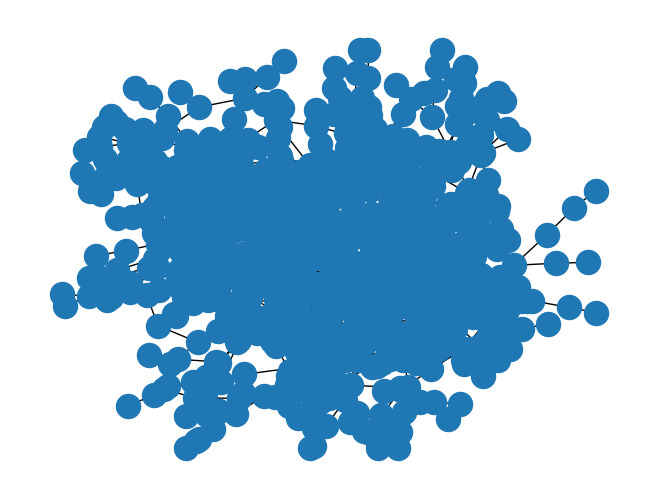

In [5]:
from torch_geometric.utils import to_networkx

for i in range(10):
    data = dataset[i]
    print(data)
    g = to_networkx(data, to_undirected=True)
    nx.draw(g)


In [6]:
print()
print(f'Dataset: {dataset}:')
print('====================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')


data = dataset[9]  # Get the first graph object.

print()
print(data)
print('=============================================================')

# Gather some statistics about the first graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


Dataset: Dataset_tree_cycle(10):
Number of graphs: 10
Number of features: 0
Number of classes: 2

Data(edge_index=[2, 158], y=[1], num_nodes=80)
Number of nodes: 80
Number of edges: 158
Average node degree: 1.98
Has isolated nodes: False
Has self-loops: False
Is undirected: True


In [7]:
data = dataset[9] 

In [8]:
data.y

tensor([0])

In [9]:
data.y

tensor([0])

In [10]:
list(Dataset_tree_cycle.raw_file_names)

TypeError: 'property' object is not iterable

In [11]:
import torch

# Creating a zero-dimensional tensor with a single value (scalar)
zero_dim_tensor = torch.tensor(0)

# Converting the zero-dimensional tensor to a one-dimensional tensor
one_dim_tensor = zero_dim_tensor.unsqueeze(0)  # Adding a dimension at index 0

print("Zero-dimensional tensor:", zero_dim_tensor)
print("One-dimensional tensor:", one_dim_tensor)

Zero-dimensional tensor: tensor(0)
One-dimensional tensor: tensor([0])


In [12]:
data = dataset[9] 

In [13]:
data.y = data.y.unsqueeze(0)

In [14]:
data.y

tensor([[0]])